<font size="4">**Install** ```zenodo_get``` **to download the files from Zenodo more easily**</font>

In [ ]:
!pip install zenodo-get

<font size="4">**Download files using the DOI**</font>

In [ ]:
!zenodo_get https://doi.org/10.5281/zenodo.7194775

<font size="4">**Unzip the file**</font>

In [ ]:
!unzip -q clss_model_gbs.zip -d ./gbs_data

<font size="4">The ```.zip``` file contains the **covariance matrices**, **grouped click probabilities** and other data from the Jiuzhang 1.0 and 2.0 experiments. Jiuzhang 2.0 has **seven different configurations** with different powers and focus waists of the light source. We identify each configuration with a number from 1 to 7. The Jiuzhang 1.0 experiment is identified with the number 0. In the following table we list all the configurations with their corresponding ID number:</font>

Experiment | Power (W) | Focus waist (μm) | Exp ID | 
:---: | :---: | :---: | :---: |
Jiuzhang 1.0 | -- | -- | 0 |   
Jiuzhang 2.0 | 0.15 | 65 | 1 |
Jiuzhang 2.0 | 0.3 | 65 | 2 |
Jiuzhang 2.0 | 0.6 | 65 | 3 |
Jiuzhang 2.0 | 1.0 | 65 | 4 |
Jiuzhang 2.0 | 1.65 | 65 | 5 |
Jiuzhang 2.0 | 1.412 | 125 | 6 |
Jiuzhang 2.0 | 0.5 | 125 | 7 | 

<font size="4">The covariance matrices related to the **ground truth of the experiments** (i.e., the theoretical model of the experiments) are stored as ```.npy``` files, and are identified as ```out_cov_squeezed_(id).npy```. The ```.zip``` file contains other covariance matrices that correspond to another theoretical model, these are identified as ```out_cov_squashed_(id).npy``` and **should not be used to generate or verify the samples**.</font>

<font size="4">Similarly, the grouped click probabilities corresponding to the ground truth of the experiments are identified as ```click_probs_squeezed_(id).npy```. The grouped click probabilities obtained from the experimental samples are identified as ```click_probs_exp_(id).npy```. The files identified as ```click_probs_squashed_(id).npy``` **should not be used to verify the samples**.</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<font size="4">Consider an $M$-mode Gaussian state, represented by the operator $\hat{\rho}$. Consider also the vector of quadrature (position and momentum) operators $\boldsymbol{\hat{r}}=(\hat{q}_1,\dots,\hat{q}_M,\hat{p}_1,\dots,\hat{p}_M)$.</font>

<font size="4">The state $\hat{\rho}$ can be completely parametrized by the vector of first moments $\bar{r}=\mathrm{Tr}(\hat{r}\hat{\rho})$ (where the trace is taken component by component) and a covariance matrix $\boldsymbol{\sigma},$ whose components are calculated as $\sigma_{jk}=\frac{1}{2}\mathrm{Tr}\left(\left\{(\hat{r}_k-\bar{r}_k),(\hat{r}_j-\bar{r}_j)\right\}\hat{\rho}\right)$. Here, $\left\{\cdot,\cdot\right\}$ stands for the anticommutator of two operators.</font>

<font size="4">In the case of the Jiuzhang experiments $\bar{r}=0$ and the state $\hat{\rho}$, which is the output state of the interferometer, is completely described by the covariance matrix. It is important to note that $\boldsymbol{\sigma}$ is computed according to the order indicated by $\boldsymbol{\hat{r}}$.</font>

<font size="4">It can be checked that the covariance matrices of the Jiuzhang experiments have size $2M\times2M$, with $M=100$ for Jiuzhang 1.0 and $M=144$ for the different configurations of Jiuzhang 2.0. It can also be checked that they are symmetric.</font>

In [2]:
cov_sqz_0 = np.load("./gbs_data/covariance_matrices/out_cov_squeezed_0.npy")
cov_sqz_3 = np.load("./gbs_data/covariance_matrices/out_cov_squeezed_3.npy")

In [3]:
np.shape(cov_sqz_0), np.shape(cov_sqz_3)

((200, 200), (288, 288))

In [4]:
np.allclose(cov_sqz_0, cov_sqz_0.T), np.allclose(cov_sqz_3, cov_sqz_3.T)

(True, True)

<font size="4">If the package ```thewalrus``` is installed, it can be verified that the covariance matrices **satisfy the uncertainty principle** (using the function ```is_valid_cov```), and **do not correspond to a classical Gaussian state** (using the function ```is_classical_cov```)</font>

<font size="4">```thewalrus``` can be installed using the command ```pip install thewalrus```</font>

In [5]:
from thewalrus.quantum import is_valid_cov, is_classical_cov

In [6]:
is_valid_cov(cov_sqz_0), is_valid_cov(cov_sqz_3)

(True, True)

In [7]:
is_classical_cov(cov_sqz_0), is_classical_cov(cov_sqz_3)

(False, False)

<font size="4">One can also compute the **photon number density** of the output state (the ratio between the mean number of photons in the state and the number of modes), and the corresponding **mean number of clicks**.</font>

In [8]:
from thewalrus.quantum import photon_number_mean_vector, mean_number_of_clicks

In [9]:
photon_number_mean_vector(np.zeros(len(cov_sqz_0)), cov_sqz_0).mean()

0.7861550479612198

In [10]:
photon_number_mean_vector(np.zeros(len(cov_sqz_3)), cov_sqz_3).mean() 

0.21764307449967588

In [11]:
mean_number_of_clicks(cov_sqz_0), mean_number_of_clicks(cov_sqz_3) 

(41.04230284287318, 24.66424093683645)

<font size="4">The grouped click distribution (also known as total click distribution) can be estimated from the samples by computing the total number of clicks (ones), $C$, in each sample, and then calculating the frequency of each $C$. We estimated this distribution for the experimental samples of the Jiuzhang experiments.</font>

In [12]:
total_click_dist_exp_0 = np.load('./gbs_data/click_probs/click_probs_exp_0.npy')

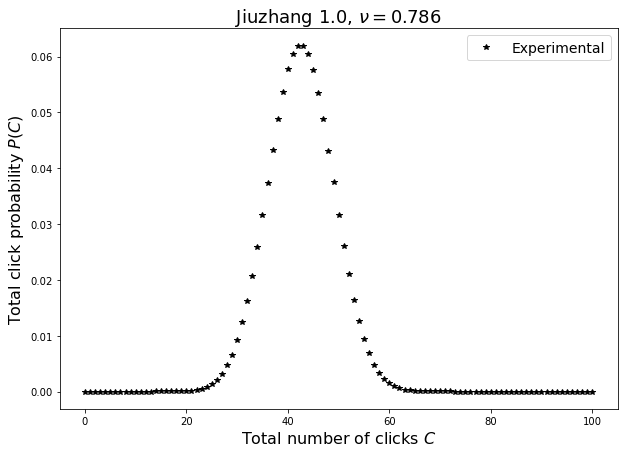

In [13]:
fig = plt.figure(figsize=(10,7))
plt.plot(total_click_dist_exp_0, 'k*', label='Experimental')
plt.xlabel(r'Total number of clicks $C$', fontsize=16)
plt.ylabel(r'Total click probability $P(C)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(r'Jiuzhang 1.0, $\nu = 0.786$', fontsize=18)
plt.show()

In [14]:
total_click_dist_exp_3 = np.load('./gbs_data/click_probs/click_probs_exp_3.npy')

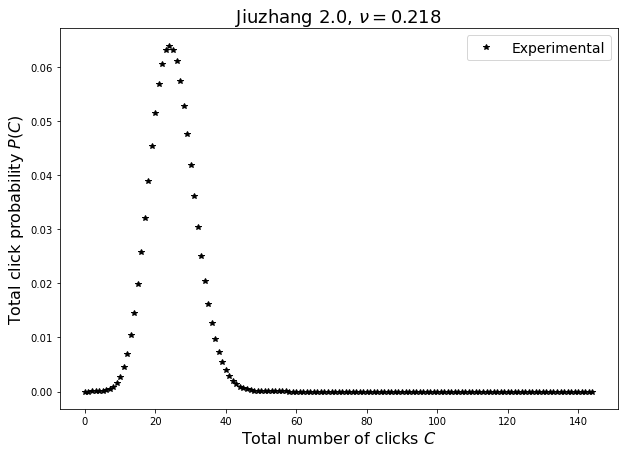

In [15]:
fig = plt.figure(figsize=(10,7))
plt.plot(total_click_dist_exp_3, 'k*', label='Experimental')
plt.xlabel(r'Total number of clicks $C$', fontsize=16)
plt.ylabel(r'Total click probability $P(C)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(r'Jiuzhang 2.0, $\nu = 0.218$', fontsize=18)
plt.show()

<font size="4">The total click distribution can also be used to estimate the mean number of clicks $\bar{C}=\sum_C C\,P(C)$.</font>

In [16]:
np.arange(0, len(total_click_dist_exp_0)) @ (total_click_dist_exp_0)

42.5317417

In [17]:
np.arange(0, len(total_click_dist_exp_3)) @ (total_click_dist_exp_3)

24.7325129

<font size="4">Interestingly, the total click distribution, unlike the distribution of individual samples, can be simulated efficiently. There is a function to do this in ```thewalrus``` (from v0.20.0 ownward) called ```grouped_click_probabilities```. This function does not take a covariance matrix as input, it uses the squeezing parameters and the transfer matrix of the experiment (the matrix representing the interferometer). This information is also in the ```.zip``` file in case it is necessary.</font>

<font size="4">We simulated these distributions for the ground truth of the different setups of the Jiuzhang experiments. They can be used to check (to some extent) if sets of samples (experimental or classically generated) are really following the expected distribution.</font>

<font size="4">In the ```click_probs_squeezed_(id).npy``` you can find the simulated probabilities and their corresponding uncertainties.</font>

In [18]:
total_click_dist_sqz_0 = np.load('./gbs_data/click_probs/click_probs_squeezed_0.npy')
total_click_dist_sqz_3 = np.load('./gbs_data/click_probs/click_probs_squeezed_3.npy')

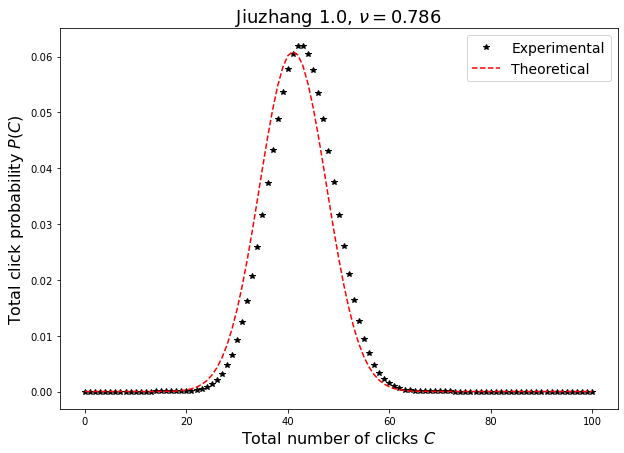

In [19]:
fig = plt.figure(figsize=(10,7))
plt.plot(total_click_dist_exp_0, 'k*', label='Experimental')
plt.plot(total_click_dist_sqz_0[0], 'r--', label='Theoretical')
plt.xlabel(r'Total number of clicks $C$', fontsize=16)
plt.ylabel(r'Total click probability $P(C)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(r'Jiuzhang 1.0, $\nu = 0.786$', fontsize=18)
plt.show()

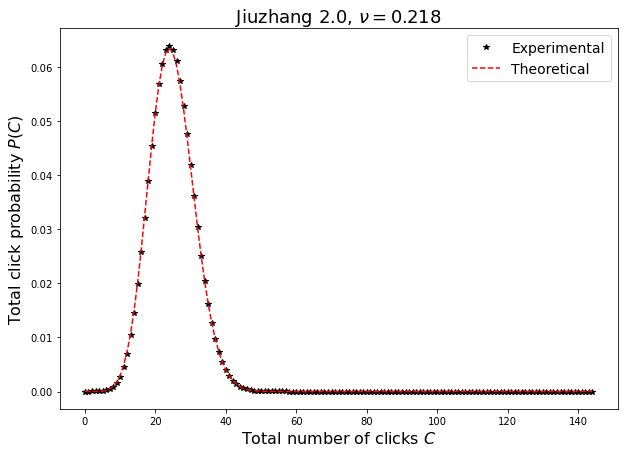

In [20]:
fig = plt.figure(figsize=(10,7))
plt.plot(total_click_dist_exp_3, 'k*', label='Experimental')
plt.plot(total_click_dist_sqz_3[0], 'r--', label='Theoretical')
plt.xlabel(r'Total number of clicks $C$', fontsize=16)
plt.ylabel(r'Total click probability $P(C)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(r'Jiuzhang 2.0, $\nu = 0.218$', fontsize=18)
plt.show()